# Schrödinger-Equation (in wave and phase form)

In [1]:
%run src/sps_test_suite.py

# periodic gaussian wave packet

## wave-spectral

Maximum number of timesteps reached. Aborting.
Finished in 100001 time steps
Finished in 0 steps.


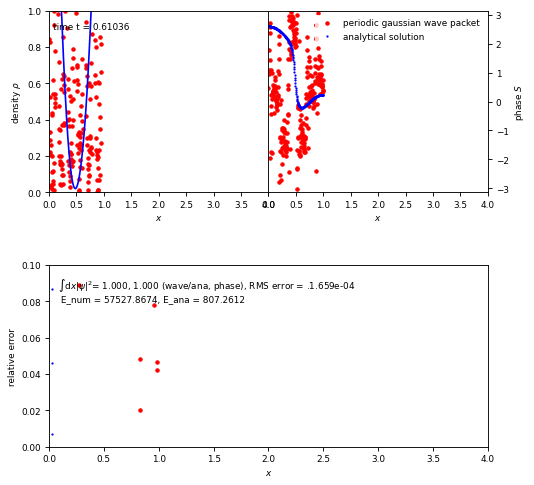

In [6]:
def extraConfig(c):
    c["nThreads"] = 2
    c["resolution"] = 256
    #c["phaseYlim"] = [-100, 100]
    c["dpi"] = 80
    c["fps"] = 1
    c["slowDown"] = 10
    c["tEnd"] = 1.5
    c["outputTimestep"] = True
    c["stencilOrder"] = 4
    c["timeOrder"] = 3
    c["C_parabolic"] = .4
    c["C_velocity"] = 1
    c["plotDensityLogarithm"] = True
    c["densityYlim"] = [0, 1]
    c["gravity"] = 1
    c["domainSize"] = 1
    c["plotDebug"] = True

runTest(test_name="periodic gaussian wave packet", scheme_name="wave-spectral", extraConfig=extraConfig)
#runTest(test_name="quasi-shock", scheme_name="phase-ho-upwind_albada")
#runTest(test_name="periodic gaussian wave packet", scheme_name="phase-ho-upwind_albada", createAnimation=True)
#runTest(test_name="wave packet collision", scheme_name="phase-ho-upwind_mc", createAnimation=True)#, useWaveSolver=True)

# cosmo 2D

## hybrid

Enabling multiprocessing via pool with 4 processes
Set up nD binary tree with N = 512
timeOrder stencilOrder 3 2
timeOrder stencilOrder 3 2
timeOrder stencilOrder 3 2
timeOrder stencilOrder 3 2
t = 0 dt = 0.00095367431640625 min density = 0.8783194019982866 max density = 1.1088908667697266
t = 0.00095367431640625 dt = 0.00095367431640625 min density = 0.8783199205957617 max density = 1.108890429988271
t = 0.0019073486328125 dt = 0.00095367431640625 min density = 0.8783202557704196 max density = 1.1088904985523607
t = 0.00286102294921875 dt = 0.00095367431640625 min density = 0.8783204074131059 max density = 1.1088910725002108
t = 0.003814697265625 dt = 0.00095367431640625 min density = 0.8783203753587224 max density = 1.108892151942874
t = 0.00476837158203125 dt = 0.00095367431640625 min density = 0.8783201594423291 max density = 1.1088937370109713
t = 0.0057220458984375 dt = 0.00095367431640625 min density = 0.8783197595502626 max density = 1.108895827812052
t = 0.00667572021484375 dt

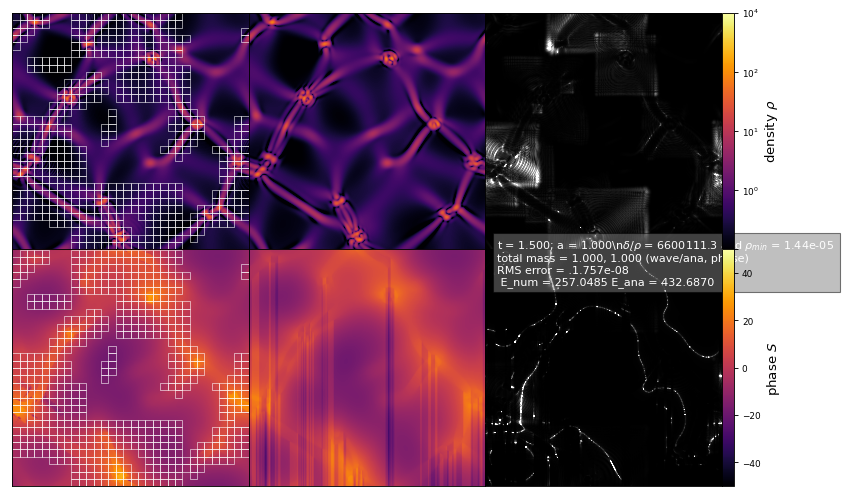

In [4]:
def extraConfig(c):
    c["nThreads"] = 4
    c["resolution"] = 512
    #c["phaseYlim"] = [-100, 100]
    c["dpi"] = 80
    c["fps"] = 1
    c["slowDown"] = 10
    c["tEnd"] = 1.5
    c["outputTimestep"] = True
    c["stencilOrder"] = 4
    c["timeOrder"] = 3
    c["C_parabolic"] = .4
    c["C_velocity"] = 1
    c["plotDensityLogarithm"] = True
    c["densityYlim"] = [0, 1]
    c["gravity"] = 1
    c["domainSize"] = 25
    c["plotDebug"] = True

runTest(test_name="cosmo 2D", scheme_name="hybrid", useWaveSolver = True, extraConfig=extraConfig)


Ordnung - 3: .2041e-8

In [ ]:
Ordnung -4: .1992

In [162]:
L = 0.01

def test(xx, yy, dx, t, m, hbar):
    return tests.cosmological2D(xx, yy, dx, t, m, hbar, Lx=L, Ly=L, eps=5e-3, N=5)

#def test(xx, yy, dx, t, m, hbar):
#    return tests.periodicLi1(xx, dx, t, m, hbar, L = 1)

c = config.generateConfig()
c["dimension"] = 2
c["usePeriodicBC"] = True
c["nThreads"] = 1
c["resolution"] = 16
#c["phaseYlim"] = [-100, 100]
c["dpi"] = 80
c["fps"] = 1
c["slowDown"] = 10
c["tEnd"] = 1.5
c["outputTimestep"] = False
c["stencilOrder"] = 2
c["timeOrder"] = 3
c["C_velocity"] = 1
c["plotDensityLogarithm"] = True
c["densityYlim"] = [0, .75]
c["plotPhaseMod2"] = False
c["phaseYlim"] = [-5, 5]
c["gravity"] = 40
c["domainSize"] = L
c["useAdaptiveTimestep"] = True

c["savePlots"] = True

#timeorders = [1, 2, 3, 4]
#for te in timeorders:
#    c["timeOrder"] = te
tEnd = 0.0001
cfls = np.linspace(0.01, 1, 20)
timeorders = [1, 2, 3, 4]
c["tEnd"] = tEnd
for timeorder in timeorders:
    c["timeOrder"] = timeorder 
    errors = []
    for cfl in cfls:
        c["C_parabolic"] = cfl 
        solver = phase_schemes.HOUpwindScheme(c, test)
        wsolver = wave_schemes.SpectralScheme(c, test)

        solver.run()
        wsolver.run()
        d1 = solver.getDensity()
        d2 = wsolver.getDensity()
        errors.append(np.sum(np.abs(d1 - d2))/c["resolution"]**2)

        
        #animation.drawFrame(solver, waveSolver=wsolver, filename=f"{timeorder}th_order_cfl={cfl}")
        #plt.show()

    np.savez(f"long_resolution={solver.dx}_{timeorder}th_order.npz", cfls = cfls, errors = errors)

Finished in 25600 time steps
Finished in 25600 time steps
Finished in 4123 time steps
Finished in 4123 time steps
Finished in 2242 time steps
Finished in 2242 time steps
Finished in 1612 time steps
Finished in 1540 time steps
Finished in 1584 time steps
Finished in 1173 time steps
Finished in 1579 time steps
Finished in 947 time steps
Finished in 4670 time steps
Finished in 794 time steps
Finished in 1590 time steps
Finished in 684 time steps
Finished in 1583 time steps
Finished in 600 time steps
Finished in 1588 time steps
Finished in 535 time steps
Finished in 1587 time steps
Finished in 483 time steps
Finished in 1584 time steps
Finished in 439 time steps
Finished in 1586 time steps
Finished in 403 time steps
Finished in 1572 time steps
Finished in 373 time steps
Finished in 1579 time steps
Finished in 347 time steps
Finished in 1570 time steps
Finished in 324 time steps
Finished in 1579 time steps
Finished in 304 time steps
Finished in 1585 time steps
Finished in 286 time steps
Fin

In [149]:

    np.savez(f"resolution={solver.dx}_{timeorder}th_order.npz", cfls = cfls, errors = errors)

    

In [148]:
cfls = cfls[:len(errors)]

In [ ]:
data = np.load("resolution=0.00125_4th_order.npz")

cfls 

[]

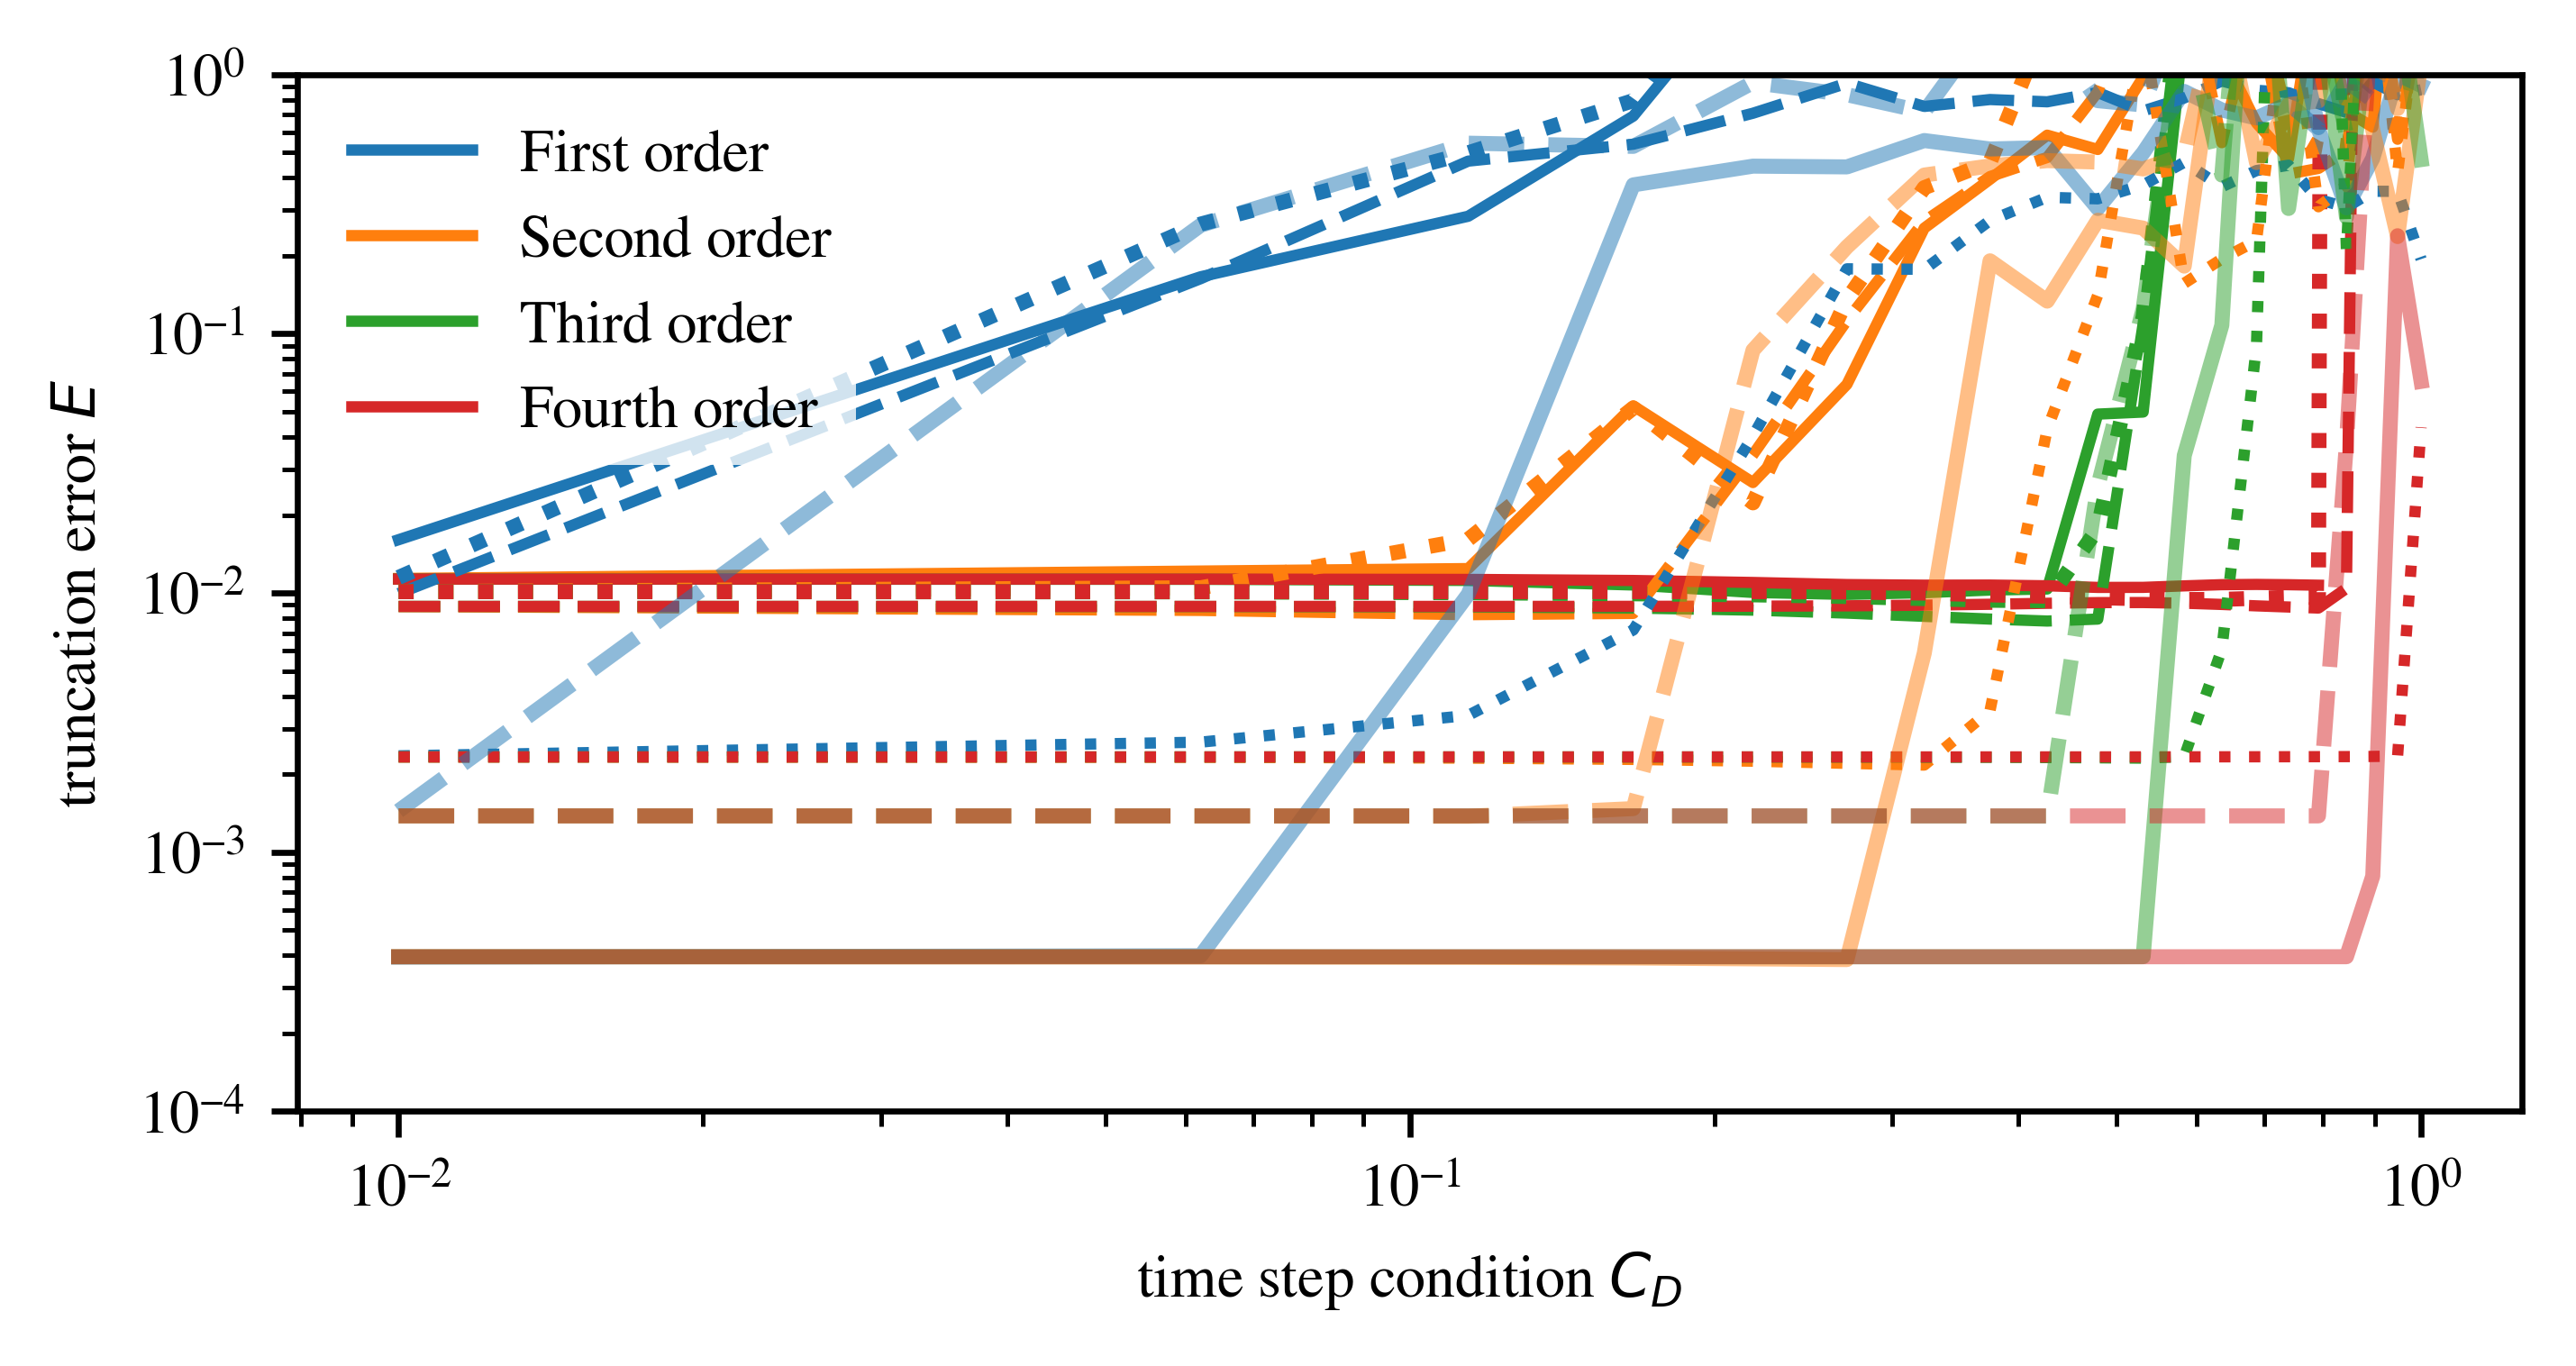

In [18]:
plt.rcParams["font.family"] = "FreeSerif"
plt.rcParams["font.size"] = 8
plt.figure(figsize=(1.5*3.54, 2.54), dpi = 600)

filenames = [
    "resolution=0.00125_1th_order.npz",
    "resolution=0.00125_2th_order.npz",
    "resolution=0.00125_3th_order.npz",
    "resolution=0.00125_4th_order.npz"
]

for i, file in enumerate(filenames):
    data = np.load(file)
    plt.loglog(data["cfls"], data["errors"], label=f"{i} 0.00125", c = f"C{i}")


filenames = [
    "resolution=0.000625_1th_order.npz",
    "resolution=0.000625_2th_order.npz",
    "resolution=0.000625_3th_order.npz",
    "resolution=0.000625_4th_order.npz"
]

for i, file in enumerate(filenames):
    data = np.load(file)
    plt.loglog(data["cfls"], data["errors"], label=f"{i} 0.000625", c = f"C{i}", ls = "dashed")

filenames = [
    "long_resolution=0.000625_1th_order.npz",
    "long_resolution=0.000625_2th_order.npz",
    "long_resolution=0.000625_3th_order.npz",
    "long_resolution=0.000625_4th_order.npz"
]

for i, file in enumerate(filenames):
    data = np.load(file)
    plt.loglog(data["cfls"], data["errors"], label=f"long {i} 0.000625", c = f"C{i}", lw = 2, ls = "dotted")

filenames = [
    "resolution=0.0003125_1th_order.npz",
    "resolution=0.0003125_2th_order.npz",
    "resolution=0.0003125_3th_order.npz",
    "resolution=0.0003125_4th_order.npz"
]

for i, file in enumerate(filenames):
    data = np.load(file)
    plt.loglog(data["cfls"], data["errors"], label=f"{i} 0.0003125", c = f"C{i}", ls = "dotted")


filenames = [
    "resolution=0.00015625_1th_order.npz",
    "resolution=0.00015625_2th_order.npz",
    "resolution=0.00015625_3th_order.npz",
    "resolution=0.00015625_4th_order.npz"
]

for i, file in enumerate(filenames):
    data = np.load(file)
    plt.loglog(data["cfls"], data["errors"], label=f"{i} 0.00015625", c = f"C{i}", lw = 2, alpha = 0.5)


filenames = [
    "long_resolution=0.00015625_1th_order.npz",
    "long_resolution=0.00015625_2th_order.npz",
    "long_resolution=0.00015625_3th_order.npz",
    "long_resolution=0.00015625_4th_order.npz"
]

for i, file in enumerate(filenames):
    data = np.load(file)
    plt.loglog(data["cfls"], data["errors"], label=f"long {i} 0.00015625", c = f"C{i}", ls="dashed", lw = 2, alpha = 0.5)


import matplotlib.lines as mlines

plots = []
labels = ["First order", "Second order", "Third order", "Fourth order"]
for i, label in enumerate(labels):
    p = mlines.Line2D([0], [0], c = f"C{i}", label=label)
    plots.append(p)

plt.ylim([1e-4, 1])
plt.ylabel("truncation error $E$")
plt.xlabel("time step condition $C_D$")
leg = plt.legend(handles = plots)
leg.get_frame().set_linewidth(0.0)
plt.savefig("../cfl_stability.pdf", bbox_inches="tight")
plt.plot()

# Res = 128

In [81]:
1/(1000**0.25)

0.17782794100389226

In [137]:
len(errors)

18

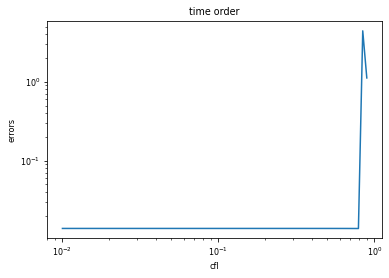

In [140]:
import matplotlib.pyplot as plt 

plt.title("time order")
plt.xlabel("cfl")
plt.ylabel("errors")
plt.loglog(cfls[:18], errors)

# Res = 64

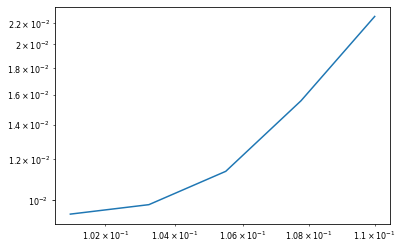

In [71]:
import matplotlib.pyplot as plt 

plt.loglog(cs, errors)

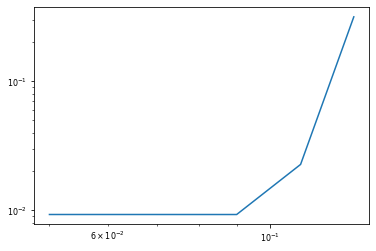

In [69]:
import matplotlib.pyplot as plt 

plt.loglog(cs, errors)

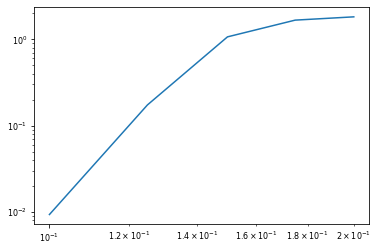

In [67]:
import matplotlib.pyplot as plt 

plt.loglog(cs, errors)

In [60]:
cs

array([0.05      , 0.05517241, 0.06034483, 0.06551724, 0.07068966,
       0.07586207, 0.08103448, 0.0862069 , 0.09137931, 0.09655172,
       0.10172414, 0.10689655, 0.11206897, 0.11724138, 0.12241379,
       0.12758621, 0.13275862, 0.13793103, 0.14310345, 0.14827586,
       0.15344828, 0.15862069, 0.1637931 , 0.16896552, 0.17413793,
       0.17931034, 0.18448276, 0.18965517, 0.19482759, 0.2       ])

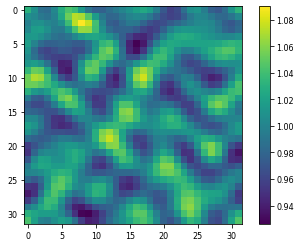

In [16]:
plt.imshow(solver.fields[0])
plt.colorbar()

In [49]:
1/6


0.16666666666666666